In [513]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
import csv
import pandas as pd

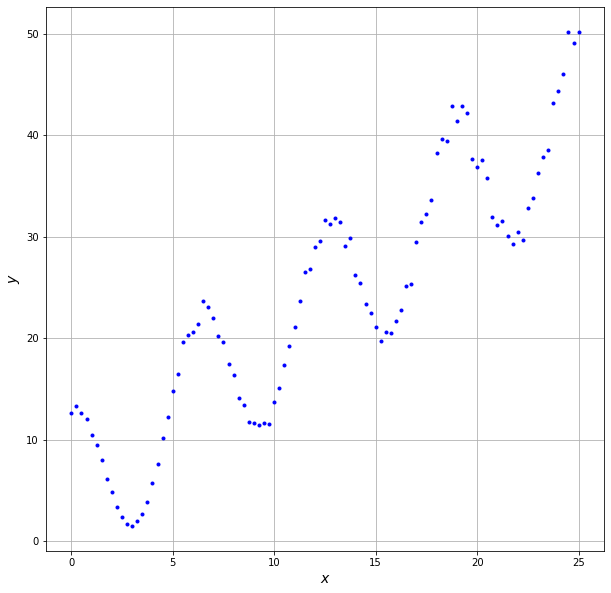

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./MMQ.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
x = x.reshape(len(x), 1)
y_noisy = y.reshape(len(y), 1)
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.show()

# Aplicando técnicas de validação cruzada para descobrir a ordem do polinômio que melhoe se aproxima à função real

# Holdout

In [515]:
# Split the whole set into random training and validation set.
maxOrder = 25
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.2, random_state=42)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

include_bias = True
mean_vec = []
train_vec = []
for d in range(1, maxOrder+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_train_predict = polynomial_regression.predict(x_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    train_vec.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

tamanho conjunto de treinamento: 80
tamanho conjunto de validação: 21


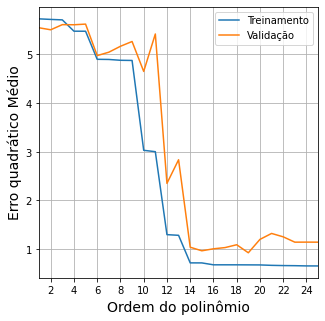

In [516]:
# Plot results.
plt.figure(figsize=(5, 5))
plt.plot(range(1, maxOrder+1), train_vec, label='Treinamento')
plt.plot(range(1, maxOrder+1), mean_vec, label='Validação')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, maxOrder+1, 2))
plt.xlim([1, maxOrder])
plt.legend()
plt.grid()
#Show the plot.
plt.show()

# K-Fold

In [517]:
# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

mean_vec = []
std_vec = []
for d in range(1, maxOrder+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

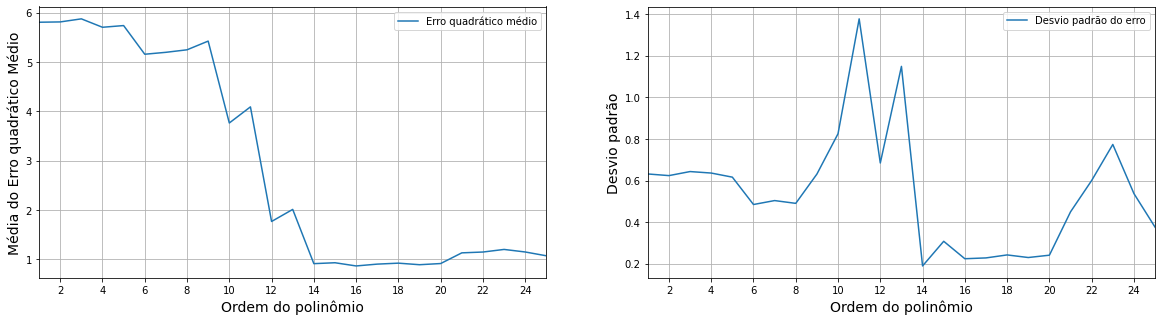

In [518]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxOrder+1), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, maxOrder+1, 2))
plt.xlim([1, maxOrder])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, maxOrder+1), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, maxOrder+1, 2))
plt.xlim([1, maxOrder])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Leave-p-Out (p=1) 

In [519]:
# Instantiate the LOOCV object.
loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, maxOrder+1):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y_noisy, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

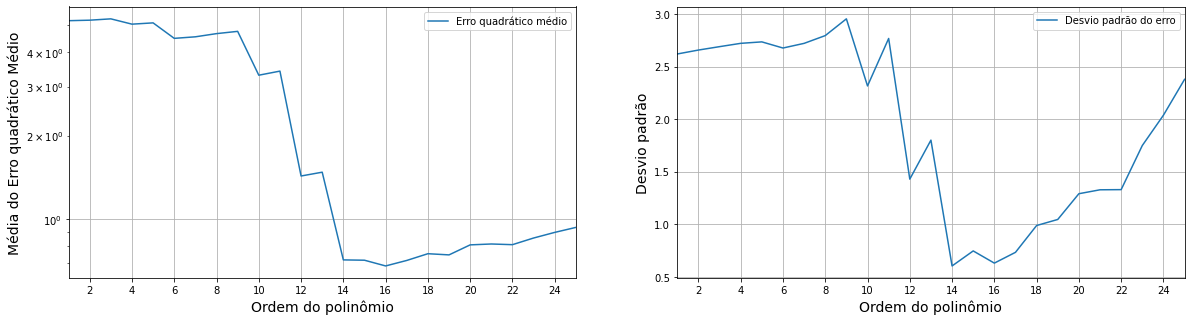

In [520]:
# Plot results.
plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxOrder+1), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.yscale('log')
plt.xticks(range(0, maxOrder+1, 2))
plt.xlim([1, maxOrder])
#plt.ylim([0.78, 0.81])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, maxOrder+1), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, maxOrder+1, 2))
plt.xlim([1, maxOrder])
plt.legend()
plt.grid()

#Show the plot.
plt.show()

# Learning curves

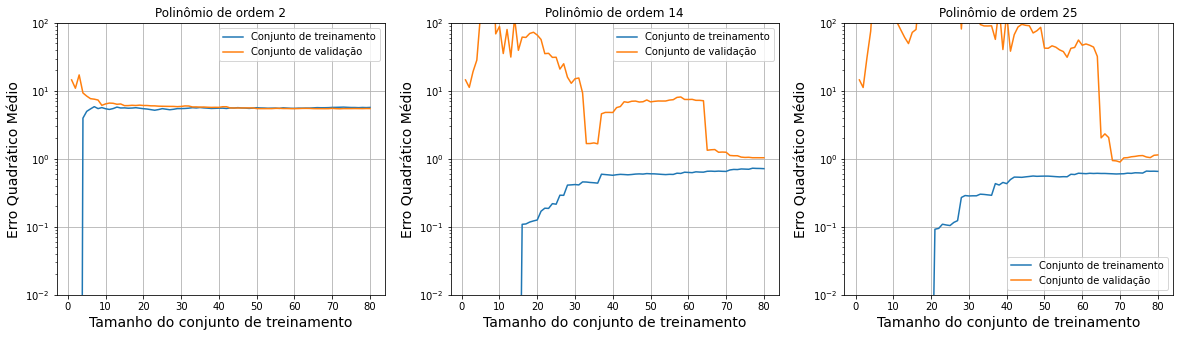

In [521]:
# Polinomial degrees to be tested.
degrees = [2, 14, 25]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.ylim([1e-2, 1e2])
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
#Show the plot.
plt.show()

In [522]:
degree = 14
include_bias = False

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)
# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
model = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])

# Train model.
model.fit(x, y_noisy)

# Prediction
x2_ = np.arange(0, 26.5, 0.25)
x2 = x2_.reshape(len(x2_),1)
y_pred = model.predict(x)
y_pred2 = model.predict(x2)

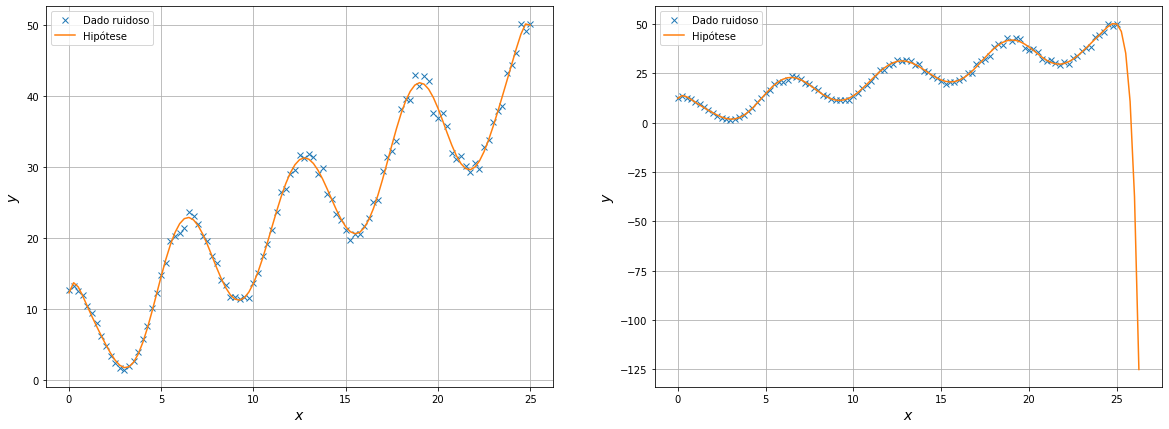

In [511]:

plt.figure(figsize=(20, 7))
ax = plt.subplot(1, 2, 1)
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y_pred, label='Hipótese')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.

ax = plt.subplot(1, 2, 2)
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x2, y_pred2, label='Hipótese')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()